In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
import itertools
import scipy.stats as stats
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
# Loading datasets
all_complex9 = pd.read_csv('Complex9.txt',header=None)

all_pima = pd.read_csv('Pid-clean.csv', header=None)

In [3]:
all_complex9.head()

,0,1,2
0,660.976,304.225,0
1,636.213,306.174,0
2,662.753,307.565,0
3,657.487,307.740,0
4,635.273,308.157,0


In [4]:
all_pima.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,156,33.6,0.627,50,1
1,1,85,66,29,156,26.6,0.351,31,0
2,8,183,64,29,156,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Lets separate the groud_truths labels from the datasets to avoid data leakage

In [5]:
# Ground Truth Labels
complex9_gt = all_complex9[2]
pima_gt = all_pima[8]

In [6]:
# Dropping Ground Truth Labels
complex9 = all_complex9.drop(2,axis=1)
pima = all_pima.drop(8, axis=1)

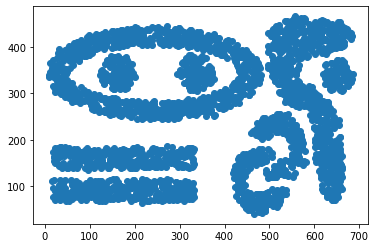

In [7]:
plt.scatter(complex9[0], complex9[1])

for `pima`, We will ignore the 4th and 5th attributes (`SkinThickness` and `Insulin`) and will z-score the dataset and will call this dataset `ZPID`

In [8]:
# As instructed, dropping 4th and 5th attributes
pima.drop([4,5], 
          axis=1, 
          inplace=True)

# Z-Score the dataset
ZPID = pima.apply(stats.zscore)
ZPID.head()

,0,1,2,3,6,7
0,0.639947,0.865041,-0.031990,0.670643,0.468492,1.425995
1,-0.844885,-1.206228,-0.528319,-0.012301,-0.365061,-0.190672
2,1.233880,2.015746,-0.693761,-0.012301,0.604397,-0.105584
3,-0.844885,-1.074719,-0.528319,-0.695245,-0.920763,-1.041549
4,-1.141852,0.503391,-2.679076,0.670643,5.484909,-0.020496


---

In [9]:
def purity(a, b, outliers=False):
    '''
    Purity is defined as the percentage
    of a clustering result based on an 
    apriori given set of class lables.
    
    Args:
        a: predicted, array
        b: ground truth labels, array
        outliers:
        
    Returns:
        Percentage of Purity. If outliers
        is set to be True, it returns a 
        tuple with purity percentage and 
        the percentage of the outliers.
    '''
    
    contingency_matrix = metrics.cluster.contingency_matrix(b, a)
    sum_most_occuring = np.sum(np.amax(contingency_matrix, axis=0))
    sum_all_occuring = np.sum(contingency_matrix)
    purity = sum_most_occuring / sum_all_occuring

    if outliers == False:
        return purity
    else:
        num_outliers = np.count_nonzero(a == -1)
        num_all = np.size(a)
        pc_outliers = (num_outliers/num_all)
        return (purity, pc_outliers)
    
    
    

---

0.7241834378093038


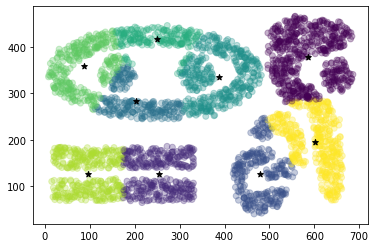

In [10]:
kmeans = KMeans(9)
y_pred = kmeans.fit_predict(complex9)
print(purity(kmeans.labels_, complex9_gt))
plt.scatter(complex9[0], 
            complex9[1], 
            c=kmeans.labels_, 
            alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='*')


In [11]:
purity(kmeans.labels_, complex9_gt)

0.7241834378093038

0.7241834378093038


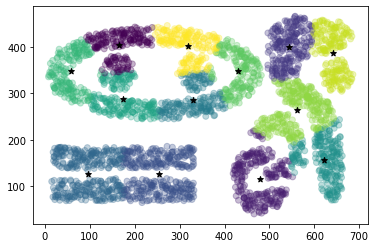

In [13]:
kmeans = KMeans(13)
y_pred = kmeans.fit_predict(complex9)
print(purity(kmeans.labels_, complex9_gt))
plt.scatter(complex9[0], 
            complex9[1], 
            c=kmeans.labels_, 
            alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='*')

In [14]:
sse = []
k_range = range(1,21)
for k in k_range:
    kmeanr = KMeans(n_clusters=k)
    kmeanr.fit(complex9)
    sse.append(kmeanr.inertia_)

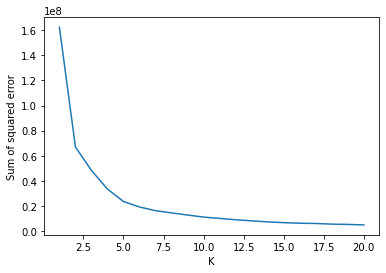

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

- elbow at 5

0.649950511382382


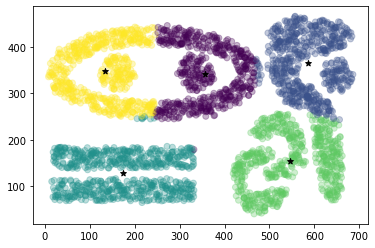

In [16]:
kmeans = KMeans(5)
y_pred = kmeans.fit_predict(complex9)
print(purity(kmeans.labels_, complex9_gt))
plt.scatter(complex9[0], 
            complex9[1], 
            c=kmeans.labels_, 
            alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='*')

0.464533157373804


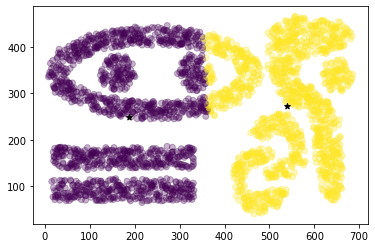

In [17]:
kmeans = KMeans(2)
y_pred = kmeans.fit_predict(complex9)
print(purity(kmeans.labels_, complex9_gt))

plt.scatter(complex9[0], 
            complex9[1], 
            c=kmeans.labels_, 
            alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='*')

In [18]:
purity(kmeans.labels_,complex9_gt)

0.464533157373804

K-Means Cluster's performance in terms of rediscovering the natural clusters (ground_truth labels) varied. At k=9, it was able to have a `purity` of 72.4%. At k=13, it garnered a `purity` score of 72.1%.  
After having a plot of Sum of Square Errors from k=1 to k=20, using the Elbow's method, we focused on k=5. But the `purity` score was found to be 65%

---

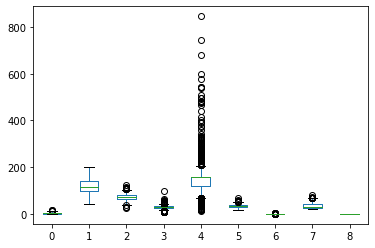

In [19]:
all_pima.plot.box()

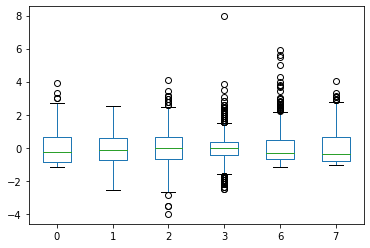

In [20]:
ZPID.plot.box()

In [21]:
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(ZPID)

In [22]:
kmeans.cluster_centers_

array([[-0.50945607, -0.56036779, -0.54077665, -0.496396  , -0.24028985,
        -0.64737786],
       [-0.51439012,  0.74113225,  0.35760139,  0.73122626,  0.55875456,
        -0.30640955],
       [ 1.05926391,  0.19276602,  0.45209596,  0.11518156, -0.09660847,
         1.0876865 ]])

In [23]:
ZPID['kmean_3'] = kmeans.labels_

In [24]:
ZPID0 = ZPID[ZPID['kmean_3'] == 0]
ZPID1 = ZPID[ZPID['kmean_3'] == 1]
ZPID2 = ZPID[ZPID['kmean_3'] == 2]

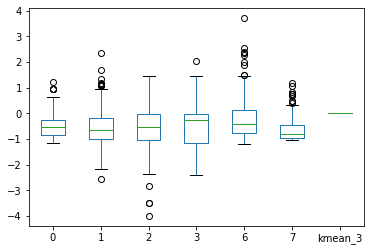

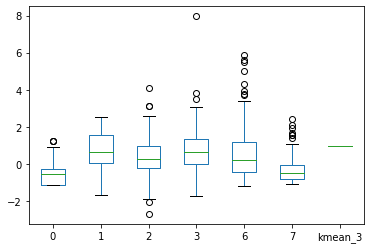

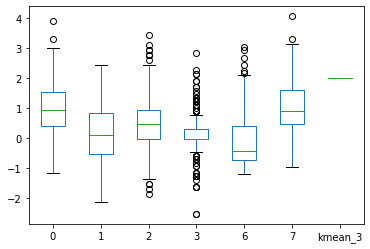

In [29]:
for df in [ZPID0, ZPID1, ZPID2]:
    df.plot.box()

---

In [30]:
from sklearn.neighbors import NearestNeighbors

The optimal value for epsilon will be found at the point of maximum curvature.

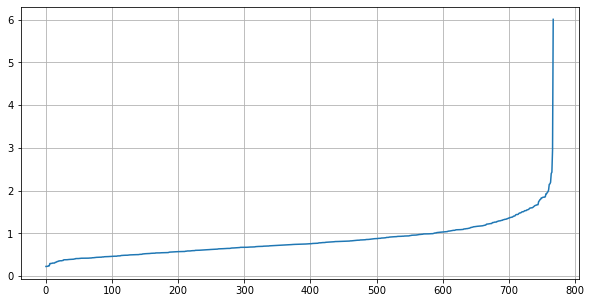

In [31]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(ZPID)
distances, idx = nn.kneighbors(ZPID)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.show()

In [33]:
dbscan = DBSCAN(eps=1.9, min_samples=2)
labels = dbscan.fit_predict(ZPID)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(ZPID, labels))
print('Purity:', purity(dbscan.labels_ ,pima_gt,  True))

Estimated number of clusters: 2
Estimated number of noise points: 12
Silhouette Coefficient: 0.382
Purity: (0.6510416666666666, 0.015625)


---

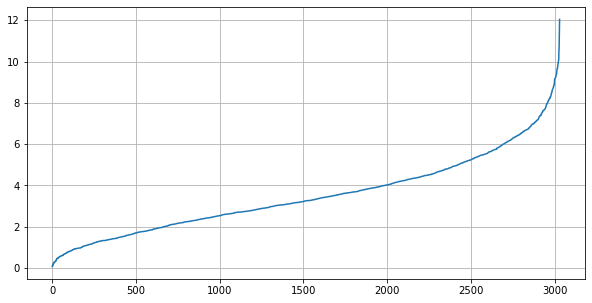

In [34]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(complex9)
distances, idx = nn.kneighbors(complex9)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.show()

In [35]:
dbscan = DBSCAN(eps=4,min_samples=2)
dbscan.fit_predict(complex9)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(complex9, labels))
print('Purity:', purity(dbscan.labels_ ,complex9_gt,  True))

Estimated number of clusters: 661
Estimated number of noise points: 1049
Purity: (0.7614648630814913, 0.34609039920818213)


- The maximum value of EPS is 59

In [36]:
list_params = []

In [37]:
def get_pairs(min_sample, eps_start, step):
    '''
    This function gets paired values of 
    EPS and min_sample
    Args:
        min_sample: min_sample
        eps_start: minumum value of eps. 
                   max is 60 by default
        step: steps eps values take.
    Return:
        Appends the list_params with the
        pairs of min_sample and eps
        '''
    for i in np.arange(eps_start, 60, step):
        pair = min_sample, i
        list_params.append(pair)
        

In [38]:
get_pairs(2,1,0.33)
get_pairs(3,1,0.33)
get_pairs(4,2,0.33)
get_pairs(5,2,0.33)
get_pairs(6,3,0.33)
get_pairs(7,3,0.33)
get_pairs(8,4,0.33)
get_pairs(9,5,0.33)
get_pairs(10,5,0.33)
get_pairs(11,6,0.33)
get_pairs(12,6,0.33)
get_pairs(13,6,0.33)
get_pairs(14,9,0.33)
get_pairs(15,9,0.33)
get_pairs(16,9,0.33)
get_pairs(17,10,0.33)
get_pairs(18,10,0.33)
get_pairs(19,10,0.33)
get_pairs(20,11,0.33)
# get_pairs(21,11,0.33)
# get_pairs(22,12,0.33)
# get_pairs(23,13,0.33)
# get_pairs(24,13,0.33)
# get_pairs(25,14,0.33)

In [39]:
range_eps = list()
range_min_samples = list()
n_clusters = list()
pc_purity = list()
n_outliers = list()
pc_outliers = list()
silhouette_coefficient = list()

In [40]:
for pair in list_params:
    min_samples = pair[0]
    range_min_samples.append(min_samples)
    eps = pair[1]
    range_eps.append(eps)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(complex9)

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_clusters.append(n_clusters_)
    pc_purity_ = purity(labels, complex9_gt, True)[0]
    pc_purity.append(pc_purity_)
    n_outliers_ = list(labels).count(-1)
    n_outliers.append(n_outliers_)
    pc_outliers_ = purity(labels, complex9_gt, True)[1]
    pc_outliers.append(pc_outliers_)
    silhouette_ = metrics.silhouette_score(complex9, labels)
    silhouette_coefficient.append(silhouette_)
    

In [41]:
report_dict = {'eps': range_eps,
               'min_samples': range_min_samples, 
              'number_of_clusters': n_clusters, 
              'percentage_purity': pc_purity, 
              'number_of_outliers': n_outliers, 
              'percentage_of_outliers': pc_outliers, 
              'silhouette_coefficient': silhouette_coefficient}

In [42]:
report_complex9 = pd.DataFrame(report_dict)

In [44]:
report_complex9[(report_complex9['number_of_clusters'].between(2,15)) & (report_complex9['percentage_of_outliers'] < 0.1)].sort_values(by=['silhouette_coefficient','percentage_purity'], ascending=False)

,eps,min_samples,number_of_clusters,percentage_purity,number_of_outliers,percentage_of_outliers,silhouette_coefficient
68,23.44,2,2,0.412075,0,0.00000,0.293689
69,23.77,2,2,0.412075,0,0.00000,0.293689
70,24.10,2,2,0.412075,0,0.00000,0.293689
71,24.43,2,2,0.412075,0,0.00000,0.293689
72,24.76,2,2,0.412075,0,0.00000,0.293689
...,...,...,...,...,...,...,...
30,10.90,2,12,0.999670,3,0.00099,-0.160373
32,11.56,2,11,1.000000,1,0.00033,-0.162265
33,11.89,2,11,1.000000,1,0.00033,-0.162265
1596,17.88,11,7,0.718575,1,0.00033,-0.163201


The results are filtered so that 
- There should be between 2 and 15 clusters
- The number of outliers should be 10% or less. 


In [45]:
report_complex9[(report_complex9['number_of_clusters'].between(2,15)) & (report_complex9['percentage_of_outliers'] < 0.1)].sort_values(by=['percentage_purity', 'silhouette_coefficient'], ascending=False)

,eps,min_samples,number_of_clusters,percentage_purity,number_of_outliers,percentage_of_outliers,silhouette_coefficient
1593,16.89,11,9,1.000000,1,0.00033,-0.063687
1594,17.22,11,9,1.000000,1,0.00033,-0.063687
1757,16.89,12,9,1.000000,1,0.00033,-0.063687
1758,17.22,12,9,1.000000,1,0.00033,-0.063687
1923,17.55,13,9,1.000000,1,0.00033,-0.063687
...,...,...,...,...,...,...,...
3117,58.52,20,2,0.412075,0,0.00000,0.293689
3118,58.85,20,2,0.412075,0,0.00000,0.293689
3119,59.18,20,2,0.412075,0,0.00000,0.293689
3120,59.51,20,2,0.412075,0,0.00000,0.293689


For the **Search Procedure** for complex9 dataset, first attempt was to find the values for Epsilon was using a curvature obtained from the NearestNeighbors(). 

Later after multiple iterations through out the grid space for a number of MinPoints, it was found that the maximum value for an Epsilon is 59. Whereas the values of Epsilon for MinPoints changed their lower bound (min value). For all the valid MinPoints, the maximum value of Epsilon remained 59.

Hence, the minimum and the maximum of the whole ranges of epsilons are worked out for each MinPoint from 1 to 20. And statistics such as number of clusters, percentage purity, numbers of outliers, percentage of outliers, and Silhouette’s Coefficients are calculated for over 3000 points.

The results are shown in the dataframe

**Maximum purity is obtained at 100% at `eps = 16.89`, `min_samples = 11` and the number of clusters are 11. however, it has a negative Silhouette Coefficient**

The best Silhouette’s Coefficient obtained was 0.2936, alongside purity percentage of 41%. The model consisted of 2 clusters with eps = 23.44, and MinPoints = 2

The performance is not desirable and hence require some more techniques to be taken care with

---


---

Using the Elbow method, 

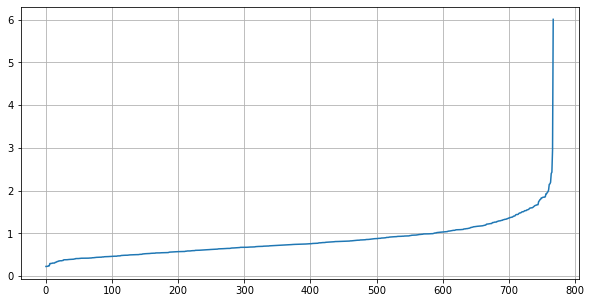

In [46]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(ZPID)
distances, idx = nn.kneighbors(ZPID)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.show()

In [47]:
dbscan = DBSCAN(eps=1.8,min_samples=241)
dbscan.fit_predict(ZPID)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(ZPID, labels))
print('Purity:', purity(dbscan.labels_ ,pima_gt,  True))

Estimated number of clusters: 1
Estimated number of noise points: 527
Silhouette Coefficient: 0.137
Purity: (0.6510416666666666, 0.6861979166666666)


In [48]:
pima_list_params = []

In [49]:
def get_pairs_pima(eps, min_sample_end, step=1):
    '''
    This function gets paired values of 
    EPS and min_sample
    Args:
        eps: eps
        min_sample_end: maximum value of min_sample. 
                       minimum is 1 by default
        step: steps eps values take, default = 1.
    Return:
        Appends the list_params with the
        pairs of min_sample and eps
        '''
    for i in np.arange(1, min_sample_end, step):
        pair = eps, i
        pima_list_params.append(pair)
        

In [50]:
get_pairs_pima(1.0,45)
get_pairs_pima(1.1,67)
get_pairs_pima(1.2,95)
get_pairs_pima(1.3,126)
get_pairs_pima(1.4,150)
get_pairs_pima(1.5,165)
get_pairs_pima(1.6,192)
get_pairs_pima(1.7,215)
get_pairs_pima(1.8,241)
get_pairs_pima(1.9,266)
get_pairs_pima(2.0,290)


In [51]:
pima_range_eps = list()
pima_range_min_samples = list()
pima_n_clusters = list()
pima_pc_purity = list()
pima_n_outliers = list()
pima_pc_outliers = list()
pima_silhouette_coefficient = list()

In [52]:
for pair in pima_list_params:
    min_samples = pair[1]
    pima_range_min_samples.append(min_samples)
    eps = pair[0]
    pima_range_eps.append(eps)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(ZPID)

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    pima_n_clusters.append(n_clusters_)
    pc_purity_ = purity(labels, pima_gt, True)[0]
    pima_pc_purity.append(pc_purity_)
    n_outliers_ = list(labels).count(-1)
    pima_n_outliers.append(n_outliers_)
    pc_outliers_ = purity(labels, pima_gt, True)[1]
    pima_pc_outliers.append(pc_outliers_)
    silhouette_ = metrics.silhouette_score(ZPID, labels)
    pima_silhouette_coefficient.append(silhouette_)
    

In [53]:
pima_report_dict = {'eps': pima_range_eps,
               'min_samples': pima_range_min_samples, 
              'number_of_clusters': pima_n_clusters, 
              'percentage_purity': pima_pc_purity, 
              'number_of_outliers': pima_n_outliers, 
              'percentage_of_outliers': pima_pc_outliers, 
              'silhouette_coefficient': pima_silhouette_coefficient}

In [54]:
report_pima = pd.DataFrame(pima_report_dict)

In [57]:
report_pima[(report_pima['number_of_clusters'].between(2,15)) & (report_pima['percentage_of_outliers'] < 0.1)].sort_values(by=['silhouette_coefficient', 'percentage_purity'], ascending=False)

,eps,min_samples,number_of_clusters,percentage_purity,number_of_outliers,percentage_of_outliers,silhouette_coefficient
1288,1.9,2,2,0.651042,12,0.015625,0.382246
836,1.7,4,2,0.651042,30,0.039062,0.220375
1048,1.8,2,2,0.651042,19,0.024740,0.209948
1049,1.8,3,2,0.651042,19,0.024740,0.209948
646,1.6,5,2,0.652344,49,0.063802,0.196406
835,1.7,3,3,0.652344,25,0.032552,0.146387
645,1.6,4,3,0.652344,40,0.052083,0.143795
644,1.6,3,3,0.652344,38,0.049479,0.143131
1552,2.0,1,9,0.656250,0,0.000000,0.128331
331,1.4,3,3,0.652344,69,0.089844,0.121571


The results are filtered so that 
- There should be between 2 and 15 clusters
- The number of outliers should be 10% or less. 


In [60]:
report_pima[(report_pima['number_of_clusters'].between(2,15)) & (report_pima['percentage_of_outliers'] < 0.1)].sort_values(by=['percentage_purity', 'silhouette_coefficient'], ascending=False)

,eps,min_samples,number_of_clusters,percentage_purity,number_of_outliers,percentage_of_outliers,silhouette_coefficient
1287,1.9,1,14,0.658854,0,0.000000,0.098188
1552,2.0,1,9,0.656250,0,0.000000,0.128331
330,1.4,2,7,0.654948,61,0.079427,-0.051614
646,1.6,5,2,0.652344,49,0.063802,0.196406
835,1.7,3,3,0.652344,25,0.032552,0.146387
645,1.6,4,3,0.652344,40,0.052083,0.143795
644,1.6,3,3,0.652344,38,0.049479,0.143131
331,1.4,3,3,0.652344,69,0.089844,0.121571
480,1.5,3,3,0.652344,54,0.070312,0.120445
834,1.7,2,4,0.652344,23,0.029948,0.095400


In the **Search Procedure** for `PIMA` dataset, I changed the approach to find the ideal parameters by relying on the point of maximum curvature obtained through NearestNeighbors().

Based on the Epsilon values from 1.0, to 2.0, all possible spaces for MinPoints were manually searched and the procedure the same statistics were calculated for nearly 2000 points.

The best Silhouette’s Coefficient obtained was 0.3822, alongside purity percentage of 65%. The model consisted of 2 clusters with eps = 1.9 and MinPoints = 2


---